## 결정트리의 앙상블 : 랜덤포레스트

## 랜덤포레스트 정리

- 서로 다른 방향으로 과대적합된 트리를 많이 만들고 그 결과를 평균을 냄으로써 과대적합을 줄인다
- 트리들이 달라지도록 무작위성을 주입한다
    - 데이터 포인트들을 무작위로 선택
    - 분할테스트에서 특성을 무작위로 선택 # 특성이 뭐지?
- 랜덤포레스트를 구축하기 위해선 트리의 갯수 등이 중요함 # 이 부분 잘 이해 안감. 116쪽
- 중요 매개 변수 :
    - max_features : 특성을 몇개를 고려할 것인가. 디폴트는 1
    - 값을 크게하면 트리들은 매우 비슷해짐, 가장 두드러진 특성을 이용해 데이터를 맞춰나감
    - 값을 낮추면 트리들이 달라지고 트리는 데이터를 맞추귀 위해 깊이가 깊어짐
    

1. 임포트 하기
    - from sklearn.tree import RandomForestClassifier
    - from sklearn.model_selection import train_test_split

2. 모델 적용하기
    
    2.1 테스트 트레인 셋 나누기
    - X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = )
    
    2.2 모델 만들기
    - forest = RandomForestClassifier()
        - 매개변수 : n_estimator(트리의 갯수), random_state =
    - forest.fit(X_train, y_train)
    
3. 모델 확인하기 : score, feature_importances, 

4. 매개변수
    - max_features : 트리가 얼마나 무작위가 될지 결정함. 작을수록 과대적합을 줄여줌. 일반적으로 기본값 씀
    - max_depth
    - n_estimators : 클수록 좋다. 많은 트리를 평균하면 과대적합을 줄일 수 있다. 하지만 느려짐.
    
    # 트리 갯수랑 깊이랑 같은 것 아닌가?
    
### n_jobs = 코어를 몇개 사용할지 결정하는 함수

## -----------------------##

## 그래디언트 부스팅 회귀 정리


- 랜덤과 다른점 : 이전 트리의 오차를 보완 하는 방식으로 순차적으로 트리를 만듬
- 무작위성이 없음
- 메모리를 적게 사용하고 예측도 빠름.
- 약한 트리(간단한모델)을 많이 연결하여 사용하자가 기본 생각
- 매개변수로 learning rate를 사용( 이전 오차를 보정하는 정도)

1. 임포트 하기
    - from sklearn.ensemble import GradientBoostingClassifier
    - 테스트셋 / 스플릿 나누기

2. 모델 적용하기
    2.1 트레인 테스트 셋 나누기
    
    2.2 모델 만들기
        - gbrt = GradientBoostingClassifier(random_state = )
        -
3. 모델 확인하기 : score, coef_, feature_importances

4. 매개변수
    - learning_rate : 이전 트리 오차 보정
    - n_estimators : 트리의 갯수를 지정
    - max_depth
    - max_leaf_nodes

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

In [6]:
from sklearn.model_selection import train_test_split

In [14]:
import mglearn

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y , random_state = 42)

In [9]:
forest = RandomForestClassifier(n_estimators=5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [17]:
lst = ['body', 'like', 'kind']
for i in enumerate(lst):
    print (i)

(0, 'body')
(1, 'like')
(2, 'kind')


In [33]:
mglearn.plots.plot_tree_partition(X, y, tree, ax= ax)

In [30]:
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    print (i, (ax, tree))

0 (<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2BE2EC50>, DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1872583848, splitter='best'))
1 (<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2BD25240>, DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=794921487, splitter='best'))
2 (<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2C8A2E10>, DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
          

In [22]:
axes.ravel()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2BE2EC50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2C3FAEF0>], dtype=object)

In [21]:
forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=111352301, splitter='best'),
 DecisionTreeClassifier(

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2BE2EC50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2C3FAEF0>], dtype=object)

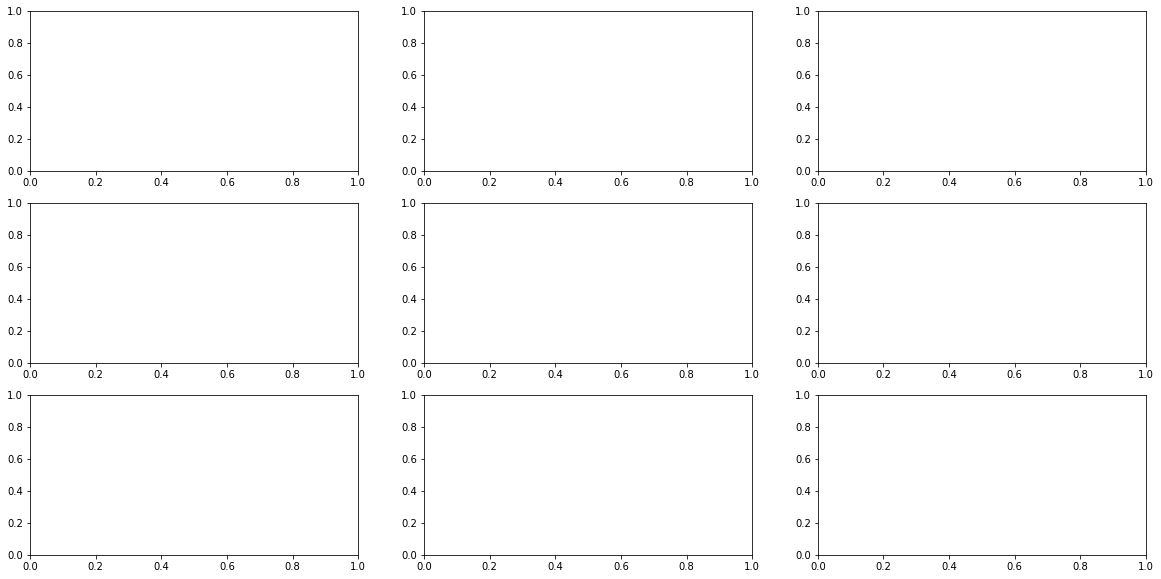

In [19]:
fig, axes = plt.subplots(3,3, figsize = (20,10))

axes.ravel()
#for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_))

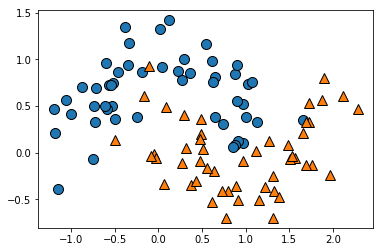

In [36]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [145]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

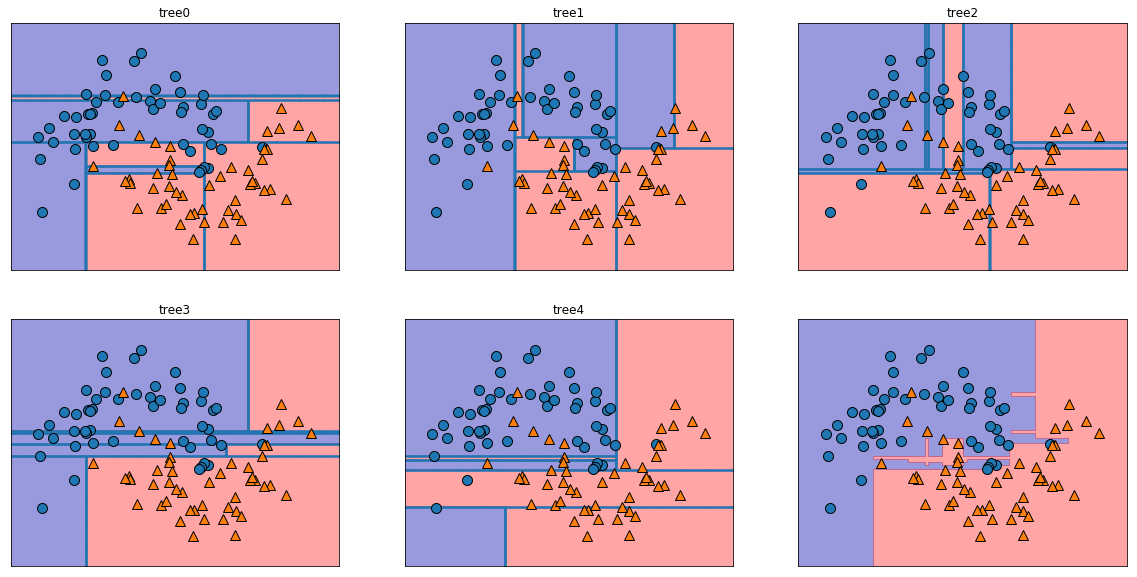

In [153]:
fig, axes = plt.subplots(2,3, figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree{}'.format(i))
    mglearn.plots.plot_tree_partition(X,y, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1, -1], alpha = .4)
#axes[-1,-1].set_title('random forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [159]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [162]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [163]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [164]:
print ('train : {:.3f}'.format(forest.score(X_train, y_train)))
print ('test : {:.3f}'.format(forest.score(X_test, y_test)))

train : 1.000
test : 0.972


In [173]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('imporatance')
    plt.ylabel('char')
    plt.ylim(-1, n_features)

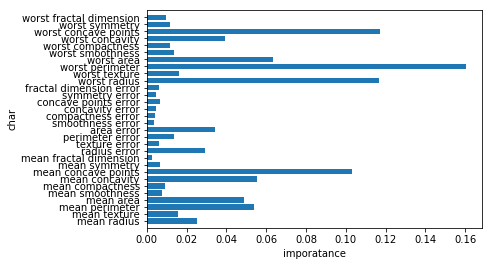

In [174]:
plot_feature_importances_cancer(forest)

In [181]:
from sklearn import tree

In [182]:
export_graphviz(forest, out_file = 'forest.dot', feature_names=cancer.feature_names, impurity = False, filled = True)

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [185]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [187]:
print ('score trian {:.3f}'.format(gbrt.score(X_train, y_train)))

score trian 1.000


In [188]:
print ('score test {:.3f}'.format(gbrt.score(X_test, y_test)))

score test 0.958


In [189]:
def show_score(model):
    print ('train {:.3f}'.format(model.score(X_train, y_train)))
    print ('test {:.3f}'.format(model.score(X_test, y_test)))

In [190]:
gbrt = GradientBoostingClassifier(random_state = 0 , max_depth = 1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [191]:
show_score(gbrt)

train 0.991
test 0.972


In [192]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [193]:
show_score(gbrt)

train 0.988
test 0.965


In [199]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

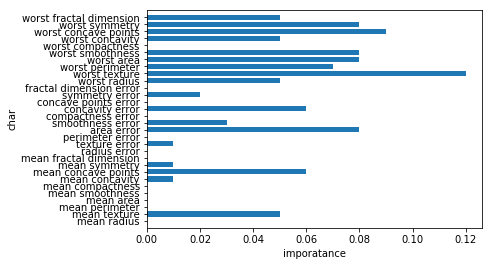

In [200]:
plot_feature_importances_cancer(gbrt)